# Machine Learning in Marketing 2020/21
## Assignment 2.3

In [3]:
# set working directory
%cd C:/Users/Christopher/Documents/MLiM/Ass2/

C:\Users\Christopher\Documents\MLiM\Ass2


In [4]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
#!pip install pyarrow

In [6]:
#load the data
aisles = pd.read_parquet("aisles.parquet")
dept = pd.read_parquet("departments.parquet")
pred_idx = pd.read_parquet("prediction_index.parquet")
orders = pd.read_parquet("orders.parquet")
prod = pd.read_parquet("products.parquet")
baskets = pd.read_parquet("baskets.parquet")

In [7]:
print("Shape of aisles: ", aisles.shape)
print("Shape of departments: ", dept.shape)
print("Shape of pred_idx: ", pred_idx.shape)
print("Shape of orders: ", orders.shape)
print("Shape of products: ", prod.shape)
print("Shape of baskets: ", baskets.shape)

Shape of aisles:  (134, 2)
Shape of departments:  (21, 2)
Shape of pred_idx:  (206209, 2)
Shape of orders:  (3214874, 6)
Shape of products:  (49688, 4)
Shape of baskets:  (32434489, 4)


In [8]:
print("Variable names of aisles: ", list(aisles.columns))
print("Variable names of departments: ", list(dept.columns))
print("Variable names of pred_idx: ", list(pred_idx.columns))
print("Variable names of orders: ", list(orders.columns))
print("Variable names of products: ", list(prod.columns))
print("Variable names of baskets: ", list(baskets.columns))

Variable names of aisles:  ['aisle_id', 'aisle']
Variable names of departments:  ['department_id', 'department']
Variable names of pred_idx:  ['user_id', 'order_number']
Variable names of orders:  ['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']
Variable names of products:  ['product_id', 'product_name', 'aisle_id', 'department_id']
Variable names of baskets:  ['order_id', 'product_id', 'add_to_cart_order', 'reordered']


In [9]:
# inner join of basket and products
baskets_prod = pd.merge(baskets, prod, on="product_id", how="inner")
baskets_prod.shape

(32434489, 7)

In [10]:
# inner join of baskets_prod and orders
baskets_prod_orders = pd.merge(baskets_prod, orders, on="order_id", how="inner")
baskets_prod_orders.shape

(32434489, 12)

In [11]:
# left join of baskets_prod_orders and department
baskets_prod_orders_dept = pd.merge(baskets_prod_orders, dept, on="department_id", how="left")
baskets_prod_orders_dept.shape

(32434489, 13)

In [12]:
# left join of baskets_prod_orders_dept and aisles
df = pd.merge(baskets_prod_orders_dept, aisles, on="aisle_id", how="left")
df.shape

(32434489, 14)

## EDA

In [13]:
df.head(20)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,3,5,9,8.0,dairy eggs,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,3,5,9,8.0,produce,fresh vegetables
2,2,45918,4,1,Coconut Butter,19,13,202279,3,5,9,8.0,pantry,oils vinegars
3,2,1819,8,1,All Natural No Stir Creamy Almond Butter,88,13,202279,3,5,9,8.0,pantry,spreads
4,2,30035,5,0,Natural Sweetener,17,13,202279,3,5,9,8.0,pantry,baking ingredients
5,2,17794,6,1,Carrots,83,4,202279,3,5,9,8.0,produce,fresh vegetables
6,2,40141,7,1,Original Unflavored Gelatine Mix,105,13,202279,3,5,9,8.0,pantry,doughs gelatins bake mixes
7,2,43668,9,0,Classic Blend Cole Slaw,123,4,202279,3,5,9,8.0,produce,packaged vegetables fruits
8,2,9327,3,0,Garlic Powder,104,13,202279,3,5,9,8.0,pantry,spices seasonings
9,26,33120,5,0,Organic Egg Whites,86,16,153404,2,0,16,7.0,dairy eggs,eggs


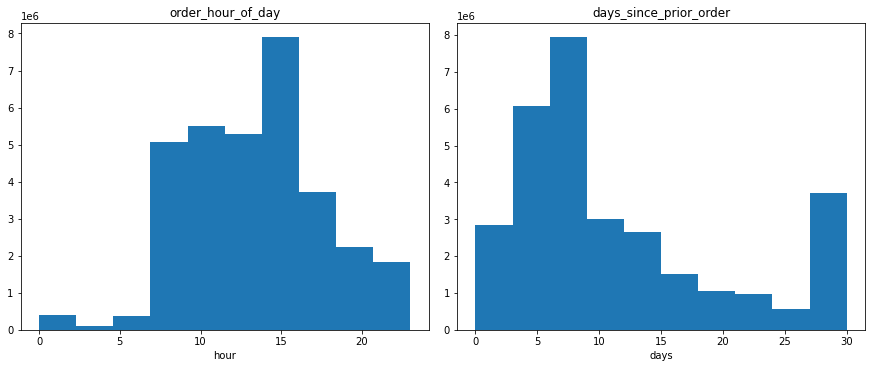

In [14]:
# some visualisations
fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(12,5))
axs[0].hist(df["order_hour_of_day"])
axs[0].set_title('order_hour_of_day')
axs[0].set_xlabel('hour')

axs[1].hist(df["days_since_prior_order"])
axs[1].set_xlabel('days')
axs[1].set_title('days_since_prior_order')

plt.show()

## Data Transformation

In [15]:
# group dataframe by order_id
df_1 = df.groupby(by="order_id").mean()
df_1

,product_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
order_id,,,,,,,,,,
2,27867.444444,5.0,0.666667,78.666667,10.333333,202279.0,3.0,5.0,9.0,8.0
3,26582.500000,4.5,1.000000,97.250000,9.375000,205970.0,16.0,5.0,17.0,12.0
4,29740.615385,7.0,0.923077,59.076923,12.846154,178520.0,36.0,1.0,9.0,7.0
5,29484.692308,13.5,0.807692,57.846154,11.653846,156122.0,42.0,6.0,16.0,9.0
6,32744.000000,2.0,0.000000,69.000000,13.666667,22352.0,4.0,1.0,12.0,30.0
...,...,...,...,...,...,...,...,...,...,...
3421079,30136.000000,1.0,0.000000,25.000000,11.000000,108687.0,6.0,1.0,13.0,0.0
3421080,23560.000000,5.0,0.444444,56.888889,10.666667,52726.0,2.0,1.0,11.0,2.0
3421081,22054.714286,4.0,0.000000,80.428571,13.285714,117076.0,1.0,3.0,11.0,NaN


In [16]:
# calculate number of items in one basket
df_1["item_count"] =df_1["add_to_cart_order"]*2-1
df_1

,product_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,item_count
order_id,,,,,,,,,,,
2,27867.444444,5.0,0.666667,78.666667,10.333333,202279.0,3.0,5.0,9.0,8.0,9.0
3,26582.500000,4.5,1.000000,97.250000,9.375000,205970.0,16.0,5.0,17.0,12.0,8.0
4,29740.615385,7.0,0.923077,59.076923,12.846154,178520.0,36.0,1.0,9.0,7.0,13.0
5,29484.692308,13.5,0.807692,57.846154,11.653846,156122.0,42.0,6.0,16.0,9.0,26.0
6,32744.000000,2.0,0.000000,69.000000,13.666667,22352.0,4.0,1.0,12.0,30.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
3421079,30136.000000,1.0,0.000000,25.000000,11.000000,108687.0,6.0,1.0,13.0,0.0,1.0
3421080,23560.000000,5.0,0.444444,56.888889,10.666667,52726.0,2.0,1.0,11.0,2.0,9.0
3421081,22054.714286,4.0,0.000000,80.428571,13.285714,117076.0,1.0,3.0,11.0,NaN,7.0


In [17]:
# not needed - cannot be interpreted
df_1 = df_1.drop(columns=["aisle_id","department_id"])

In [18]:
# check dataframe for one exemplary customer
df_1[df_1["user_id"]==202279.0]

,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,item_count
order_id,,,,,,,,,
2,27867.444444,5.0,0.666667,202279.0,3.0,5.0,9.0,8.0,9.0
104690,24877.000000,6.5,0.416667,202279.0,8.0,6.0,10.0,30.0,12.0
132412,28842.090909,6.0,0.818182,202279.0,6.0,5.0,9.0,30.0,11.0
1500071,20449.083333,6.5,0.250000,202279.0,2.0,4.0,13.0,20.0,12.0
2382766,27797.000000,9.0,0.529412,202279.0,7.0,1.0,14.0,24.0,17.0
2808715,23844.000000,6.0,0.727273,202279.0,5.0,5.0,13.0,9.0,11.0
2894949,18479.900000,5.5,0.000000,202279.0,1.0,5.0,9.0,NaN,10.0
3058248,25695.250000,4.5,0.375000,202279.0,4.0,3.0,14.0,30.0,8.0


In [19]:
# create dataframe with user_id as key, aggregating all orders of a user by calculating the mean
df_2 = df_1.groupby(by="user_id").mean()
df_2

,product_id,add_to_cart_order,reordered,order_number,order_dow,order_hour_of_day,days_since_prior_order,item_count
user_id,,,,,,,,
1.0,17189.803611,3.450000,0.705833,5.5,2.500000,10.300000,19.555556,5.900000
2.0,25507.097335,7.464286,0.447961,7.5,2.142857,10.571429,15.230769,13.928571
3.0,27813.333333,4.166667,0.658817,6.5,1.083333,16.416667,12.090909,7.333333
4.0,23471.276190,2.300000,0.028571,3.0,4.800000,12.600000,13.750000,3.600000
5.0,22770.456692,5.125000,0.377778,2.5,1.750000,16.000000,13.333333,9.250000
...,...,...,...,...,...,...,...,...
206205.0,28366.204482,5.833333,0.369048,2.0,3.666667,14.333333,20.000000,10.666667
206206.0,29294.680325,2.626866,0.570676,34.0,2.477612,16.731343,3.772727,4.253731
206207.0,26865.592900,7.468750,0.637144,8.5,2.562500,12.500000,14.333333,13.937500


In [20]:
# calculate number of orders
df_2["no_orders"] =df_2["order_number"]*2-1
df_2 = df_2.drop(columns=["order_number"])
df_2

,product_id,add_to_cart_order,reordered,order_dow,order_hour_of_day,days_since_prior_order,item_count,no_orders
user_id,,,,,,,,
1.0,17189.803611,3.450000,0.705833,2.500000,10.300000,19.555556,5.900000,10.0
2.0,25507.097335,7.464286,0.447961,2.142857,10.571429,15.230769,13.928571,14.0
3.0,27813.333333,4.166667,0.658817,1.083333,16.416667,12.090909,7.333333,12.0
4.0,23471.276190,2.300000,0.028571,4.800000,12.600000,13.750000,3.600000,5.0
5.0,22770.456692,5.125000,0.377778,1.750000,16.000000,13.333333,9.250000,4.0
...,...,...,...,...,...,...,...,...
206205.0,28366.204482,5.833333,0.369048,3.666667,14.333333,20.000000,10.666667,3.0
206206.0,29294.680325,2.626866,0.570676,2.477612,16.731343,3.772727,4.253731,67.0
206207.0,26865.592900,7.468750,0.637144,2.562500,12.500000,14.333333,13.937500,16.0


In [21]:
# not needed
df_2 = df_2.drop(columns=["add_to_cart_order"])

In [22]:
df_2 = df_2.rename(columns={"days_since_prior_order": "order_frequency_in_days"})
df_2 = df_2.rename(columns={"reordered": "reordered_ratio"})
df_2

,product_id,reordered_ratio,order_dow,order_hour_of_day,order_frequency_in_days,item_count,no_orders
user_id,,,,,,,
1.0,17189.803611,0.705833,2.500000,10.300000,19.555556,5.900000,10.0
2.0,25507.097335,0.447961,2.142857,10.571429,15.230769,13.928571,14.0
3.0,27813.333333,0.658817,1.083333,16.416667,12.090909,7.333333,12.0
4.0,23471.276190,0.028571,4.800000,12.600000,13.750000,3.600000,5.0
5.0,22770.456692,0.377778,1.750000,16.000000,13.333333,9.250000,4.0
...,...,...,...,...,...,...,...
206205.0,28366.204482,0.369048,3.666667,14.333333,20.000000,10.666667,3.0
206206.0,29294.680325,0.570676,2.477612,16.731343,3.772727,4.253731,67.0
206207.0,26865.592900,0.637144,2.562500,12.500000,14.333333,13.937500,16.0


In [23]:
# drop product_id
df_2 = df_2.drop(columns=["product_id"])
df_2

,reordered_ratio,order_dow,order_hour_of_day,order_frequency_in_days,item_count,no_orders
user_id,,,,,,
1.0,0.705833,2.500000,10.300000,19.555556,5.900000,10.0
2.0,0.447961,2.142857,10.571429,15.230769,13.928571,14.0
3.0,0.658817,1.083333,16.416667,12.090909,7.333333,12.0
4.0,0.028571,4.800000,12.600000,13.750000,3.600000,5.0
5.0,0.377778,1.750000,16.000000,13.333333,9.250000,4.0
...,...,...,...,...,...,...
206205.0,0.369048,3.666667,14.333333,20.000000,10.666667,3.0
206206.0,0.570676,2.477612,16.731343,3.772727,4.253731,67.0
206207.0,0.637144,2.562500,12.500000,14.333333,13.937500,16.0


In [24]:
# reset proper indexing of dataframe and add user_id as a column
df_2["user_id"]=df_2.index
df_2["user_id"]=df_2["user_id"].astype(int)
df_2 = df_2.reset_index(drop=True)
df_2

,reordered_ratio,order_dow,order_hour_of_day,order_frequency_in_days,item_count,no_orders,user_id
0,0.705833,2.500000,10.300000,19.555556,5.900000,10.0,1
1,0.447961,2.142857,10.571429,15.230769,13.928571,14.0,2
2,0.658817,1.083333,16.416667,12.090909,7.333333,12.0,3
3,0.028571,4.800000,12.600000,13.750000,3.600000,5.0,4
4,0.377778,1.750000,16.000000,13.333333,9.250000,4.0,5
...,...,...,...,...,...,...,...
206204,0.369048,3.666667,14.333333,20.000000,10.666667,3.0,206205
206205,0.570676,2.477612,16.731343,3.772727,4.253731,67.0,206206
206206,0.637144,2.562500,12.500000,14.333333,13.937500,16.0,206207
206207,0.700368,2.653061,14.265306,7.437500,13.816327,49.0,206208


In [26]:
df.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,3,5,9,8.0,dairy eggs,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,3,5,9,8.0,produce,fresh vegetables
2,2,45918,4,1,Coconut Butter,19,13,202279,3,5,9,8.0,pantry,oils vinegars
3,2,1819,8,1,All Natural No Stir Creamy Almond Butter,88,13,202279,3,5,9,8.0,pantry,spreads
4,2,30035,5,0,Natural Sweetener,17,13,202279,3,5,9,8.0,pantry,baking ingredients
5,2,17794,6,1,Carrots,83,4,202279,3,5,9,8.0,produce,fresh vegetables
6,2,40141,7,1,Original Unflavored Gelatine Mix,105,13,202279,3,5,9,8.0,pantry,doughs gelatins bake mixes
7,2,43668,9,0,Classic Blend Cole Slaw,123,4,202279,3,5,9,8.0,produce,packaged vegetables fruits
8,2,9327,3,0,Garlic Powder,104,13,202279,3,5,9,8.0,pantry,spices seasonings
9,26,33120,5,0,Organic Egg Whites,86,16,153404,2,0,16,7.0,dairy eggs,eggs


In [27]:
df_1.head()

,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,item_count
order_id,,,,,,,,,
2,27867.444444,5.0,0.666667,202279.0,3.0,5.0,9.0,8.0,9.0
3,26582.500000,4.5,1.000000,205970.0,16.0,5.0,17.0,12.0,8.0
4,29740.615385,7.0,0.923077,178520.0,36.0,1.0,9.0,7.0,13.0
5,29484.692308,13.5,0.807692,156122.0,42.0,6.0,16.0,9.0,26.0
6,32744.000000,2.0,0.000000,22352.0,4.0,1.0,12.0,30.0,3.0


In [28]:
df_2.head()

,reordered_ratio,order_dow,order_hour_of_day,order_frequency_in_days,item_count,no_orders,user_id
0,0.705833,2.500000,10.300000,19.555556,5.900000,10.0,1
1,0.447961,2.142857,10.571429,15.230769,13.928571,14.0,2
2,0.658817,1.083333,16.416667,12.090909,7.333333,12.0,3
3,0.028571,4.800000,12.600000,13.750000,3.600000,5.0,4
4,0.377778,1.750000,16.000000,13.333333,9.250000,4.0,5


In [29]:
# list of orders - they are alredy sorted correctly
loo = df[["order_id","user_id","order_number"]].sort_values(by=["order_number"]).groupby(by="user_id").agg({'order_id':lambda x: list(x)}).reset_index(drop=False)
loo = loo.rename(columns={"order_id": "list_of_orders"})
# remove dublicates
loo["list_of_orders"] = loo["list_of_orders"].apply(lambda x: list(dict.fromkeys(x)))
loo.head()

,user_id,list_of_orders
0,1,"[2539329, 2398795, 473747, 2254736, 431534, 33..."
1,2,"[2168274, 1501582, 1901567, 738281, 1673511, 1..."
2,3,"[1374495, 444309, 3002854, 2037211, 2710558, 1..."
3,4,"[3343014, 2030307, 691089, 94891, 2557754]"
4,5,"[2717275, 1909121, 2267326, 157374]"


In [30]:
# check again for exemplary customer 5
df[df["user_id"]==5][["order_id","user_id","order_number"]].sort_values(by=["order_number"]).drop_duplicates()

,order_id,user_id,order_number
20221474,2717275,5,1
28731600,1909121,5,2
28321840,2267326,5,3
25337602,157374,5,4


In [31]:
print(f"Every customer has at least {min(loo.list_of_orders.apply(len))} orders.")

Every customer has at least 3 orders.


In [32]:
# get the last 4 order_id's
loo["order_lag_0"] = loo["list_of_orders"].apply(lambda x: x[-1])
loo["order_lag_1"] = loo["list_of_orders"].apply(lambda x: x[-2])
loo["order_lag_2"] = loo["list_of_orders"].apply(lambda x: x[-3])
loo["order_lag_3"] = loo["list_of_orders"].apply(lambda x: x[-4] if len(x)>3 else -1)
loo

,user_id,list_of_orders,order_lag_0,order_lag_1,order_lag_2,order_lag_3
0,1,"[2539329, 2398795, 473747, 2254736, 431534, 33...",2550362,2295261,3108588,550135
1,2,"[2168274, 1501582, 1901567, 738281, 1673511, 1...",839880,3268552,3186735,1402090
2,3,"[1374495, 444309, 3002854, 2037211, 2710558, 1...",1402502,521107,676467,3160850
3,4,"[3343014, 2030307, 691089, 94891, 2557754]",2557754,94891,691089,2030307
4,5,"[2717275, 1909121, 2267326, 157374]",157374,2267326,1909121,2717275
...,...,...,...,...,...,...
206204,206205,"[969311, 2658896, 414137]",414137,2658896,969311,-1
206205,206206,"[3189322, 3351137, 540764, 2975608, 2028659, 5...",1904200,2986341,2750895,2643521
206206,206207,"[2166133, 1074448, 1666077, 2364140, 2277235, ...",1005822,2991173,2832273,1452193
206207,206208,"[2227043, 1959749, 3392839, 731227, 2936891, 2...",1882108,1285346,2239861,3059777


In [33]:
# merge: get the days_since_prior_order for each order_id, with user_id for later matching
lag_days_0 = pd.merge(loo["order_lag_0"], df[["order_id", "days_since_prior_order","user_id"]], how="left", left_on = ["order_lag_0"], right_on=["order_id"]).groupby(by="order_lag_0").max()
lag_days_0 = lag_days_0.rename(columns={"days_since_prior_order": "days_lag_0"}).drop(columns=["order_id"])

lag_days_1 = pd.merge(loo["order_lag_1"], df[["order_id", "days_since_prior_order","user_id"]], how="left", left_on = ["order_lag_1"], right_on=["order_id"]).groupby(by="order_lag_1").max()
lag_days_1 = lag_days_1.rename(columns={"days_since_prior_order": "days_lag_1"}).drop(columns=["order_id"])
lag_days_1

lag_days_2 = pd.merge(loo["order_lag_2"], df[["order_id", "days_since_prior_order","user_id"]], how="left", left_on = ["order_lag_2"], right_on=["order_id"]).groupby(by="order_lag_2").max()
lag_days_2 = lag_days_2.rename(columns={"days_since_prior_order": "days_lag_2"}).drop(columns=["order_id"])
lag_days_2

lag_days_3 = pd.merge(loo["order_lag_3"], df[["order_id", "days_since_prior_order","user_id"]], how="left", left_on = ["order_lag_3"], right_on=["order_id"]).groupby(by="order_lag_3").max()
lag_days_3 = lag_days_3.rename(columns={"days_since_prior_order": "days_lag_3"}).drop(columns=["order_id"])
lag_days_3

,days_lag_3,user_id
order_lag_3,,
-1,NaN,NaN
45,0.0,37913.0
75,NaN,106387.0
84,5.0,21551.0
87,4.0,155476.0
...,...,...
3421002,28.0,75028.0
3421024,NaN,9166.0
3421052,6.0,129045.0


In [34]:
df_3 = df_2.copy()
df_3.head()

,reordered_ratio,order_dow,order_hour_of_day,order_frequency_in_days,item_count,no_orders,user_id
0,0.705833,2.500000,10.300000,19.555556,5.900000,10.0,1
1,0.447961,2.142857,10.571429,15.230769,13.928571,14.0,2
2,0.658817,1.083333,16.416667,12.090909,7.333333,12.0,3
3,0.028571,4.800000,12.600000,13.750000,3.600000,5.0,4
4,0.377778,1.750000,16.000000,13.333333,9.250000,4.0,5


In [35]:
# merge all days_lag_n with df_3
df_3 = pd.merge(df_3, lag_days_0, how="left", on="user_id")
df_3 = pd.merge(df_3, lag_days_1, how="left", on="user_id")
df_3 = pd.merge(df_3, lag_days_2, how="left", on="user_id")
df_3 = pd.merge(df_3, lag_days_3, how="left", on="user_id")
df_3

,reordered_ratio,order_dow,order_hour_of_day,order_frequency_in_days,item_count,no_orders,user_id,days_lag_0,days_lag_1,days_lag_2,days_lag_3
0,0.705833,2.500000,10.300000,19.555556,5.900000,10.0,1,30.0,0.0,14.0,20.0
1,0.447961,2.142857,10.571429,15.230769,13.928571,14.0,2,13.0,30.0,28.0,30.0
2,0.658817,1.083333,16.416667,12.090909,7.333333,12.0,3,15.0,11.0,17.0,7.0
3,0.028571,4.800000,12.600000,13.750000,3.600000,5.0,4,0.0,15.0,21.0,19.0
4,0.377778,1.750000,16.000000,13.333333,9.250000,4.0,5,19.0,10.0,11.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
206204,0.369048,3.666667,14.333333,20.000000,10.666667,3.0,206205,10.0,30.0,NaN,NaN
206205,0.570676,2.477612,16.731343,3.772727,4.253731,67.0,206206,11.0,14.0,10.0,2.0
206206,0.637144,2.562500,12.500000,14.333333,13.937500,16.0,206207,18.0,7.0,4.0,30.0
206207,0.700368,2.653061,14.265306,7.437500,13.816327,49.0,206208,7.0,5.0,9.0,13.0


In [36]:
# calculate mean frequency without days_lag_0
# formula = (mean * n - x0)/(n-1)
# mind that no_orders = n+1
df_3["order_frequency_without_lag_0"] = (df_3["order_frequency_in_days"] * (df_3["no_orders"]-1)-df_3["days_lag_0"])/(df_3["no_orders"]-2)
df_3

,reordered_ratio,order_dow,order_hour_of_day,order_frequency_in_days,item_count,no_orders,user_id,days_lag_0,days_lag_1,days_lag_2,days_lag_3,order_frequency_without_lag_0
0,0.705833,2.500000,10.300000,19.555556,5.900000,10.0,1,30.0,0.0,14.0,20.0,18.250000
1,0.447961,2.142857,10.571429,15.230769,13.928571,14.0,2,13.0,30.0,28.0,30.0,15.416667
2,0.658817,1.083333,16.416667,12.090909,7.333333,12.0,3,15.0,11.0,17.0,7.0,11.800000
3,0.028571,4.800000,12.600000,13.750000,3.600000,5.0,4,0.0,15.0,21.0,19.0,18.333333
4,0.377778,1.750000,16.000000,13.333333,9.250000,4.0,5,19.0,10.0,11.0,NaN,10.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
206204,0.369048,3.666667,14.333333,20.000000,10.666667,3.0,206205,10.0,30.0,NaN,NaN,30.000000
206205,0.570676,2.477612,16.731343,3.772727,4.253731,67.0,206206,11.0,14.0,10.0,2.0,3.661538
206206,0.637144,2.562500,12.500000,14.333333,13.937500,16.0,206207,18.0,7.0,4.0,30.0,14.071429
206207,0.700368,2.653061,14.265306,7.437500,13.816327,49.0,206208,7.0,5.0,9.0,13.0,7.446809


In [102]:
# impute days_lag_2 and days_lag_3 with mean
df_4 = df_3.copy()
df_4.days_lag_3[df_4.days_lag_3.isna()] = df_4.order_frequency_without_lag_0[df_4.days_lag_3.isna()]
df_4.days_lag_2[df_4.days_lag_2.isna()] = df_4.order_frequency_without_lag_0[df_4.days_lag_2.isna()]
df_4

,reordered_ratio,order_dow,order_hour_of_day,order_frequency_in_days,item_count,no_orders,user_id,days_lag_0,days_lag_1,days_lag_2,days_lag_3,order_frequency_without_lag_0
0,0.705833,2.500000,10.300000,19.555556,5.900000,10.0,1,30.0,0.0,14.0,20.0,18.250000
1,0.447961,2.142857,10.571429,15.230769,13.928571,14.0,2,13.0,30.0,28.0,30.0,15.416667
2,0.658817,1.083333,16.416667,12.090909,7.333333,12.0,3,15.0,11.0,17.0,7.0,11.800000
3,0.028571,4.800000,12.600000,13.750000,3.600000,5.0,4,0.0,15.0,21.0,19.0,18.333333
4,0.377778,1.750000,16.000000,13.333333,9.250000,4.0,5,19.0,10.0,11.0,10.5,10.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
206204,0.369048,3.666667,14.333333,20.000000,10.666667,3.0,206205,10.0,30.0,30.0,30.0,30.000000
206205,0.570676,2.477612,16.731343,3.772727,4.253731,67.0,206206,11.0,14.0,10.0,2.0,3.661538
206206,0.637144,2.562500,12.500000,14.333333,13.937500,16.0,206207,18.0,7.0,4.0,30.0,14.071429
206207,0.700368,2.653061,14.265306,7.437500,13.816327,49.0,206208,7.0,5.0,9.0,13.0,7.446809


In [103]:
# create binary feature: will the customer come back within 14 days? --> days_lag_0

df_4["comes_within_14_days"] = 0
df_4["comes_within_14_days"][df_4["days_lag_0"]<14] = 1 
df_4

,reordered_ratio,order_dow,order_hour_of_day,order_frequency_in_days,item_count,no_orders,user_id,days_lag_0,days_lag_1,days_lag_2,days_lag_3,order_frequency_without_lag_0,comes_within_14_days
0,0.705833,2.500000,10.300000,19.555556,5.900000,10.0,1,30.0,0.0,14.0,20.0,18.250000,0
1,0.447961,2.142857,10.571429,15.230769,13.928571,14.0,2,13.0,30.0,28.0,30.0,15.416667,1
2,0.658817,1.083333,16.416667,12.090909,7.333333,12.0,3,15.0,11.0,17.0,7.0,11.800000,0
3,0.028571,4.800000,12.600000,13.750000,3.600000,5.0,4,0.0,15.0,21.0,19.0,18.333333,1
4,0.377778,1.750000,16.000000,13.333333,9.250000,4.0,5,19.0,10.0,11.0,10.5,10.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,0.369048,3.666667,14.333333,20.000000,10.666667,3.0,206205,10.0,30.0,30.0,30.0,30.000000,1
206205,0.570676,2.477612,16.731343,3.772727,4.253731,67.0,206206,11.0,14.0,10.0,2.0,3.661538,1
206206,0.637144,2.562500,12.500000,14.333333,13.937500,16.0,206207,18.0,7.0,4.0,30.0,14.071429,0
206207,0.700368,2.653061,14.265306,7.437500,13.816327,49.0,206208,7.0,5.0,9.0,13.0,7.446809,1


## Train-Test Split

In [39]:
print(f"There are {len(pd.unique(df.user_id))} unique customers in the data set.")

There are 206209 unique customers in the data set.


In [40]:
# create train test split on customers
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_4, test_size=0.25)

In [41]:
# check size
len(df_test), len(df_train) , len(df_test)+len(df_train) , len(df_4)

(51553, 154656, 206209, 206209)

## Model Training

In [42]:
df_train

,reordered_ratio,order_dow,order_hour_of_day,order_frequency_in_days,item_count,no_orders,user_id,days_lag_0,days_lag_1,days_lag_2,days_lag_3,order_frequency_without_lag_0,comes_within_14_days
71793,0.222222,5.333333,11.666667,0.500000,2.666667,3.0,71794,1.0,0.0,0.0,0.0,0.000000,1
203613,0.486189,3.923077,14.615385,15.500000,10.384615,13.0,203614,12.0,30.0,13.0,30.0,15.818182,1
196903,0.418448,3.052632,13.842105,6.833333,8.631579,19.0,196904,6.0,3.0,16.0,5.0,6.882353,1
12711,0.741667,4.400000,12.700000,23.777778,2.800000,10.0,12712,30.0,12.0,30.0,30.0,23.000000,0
178049,0.381985,3.545455,13.818182,20.100000,13.000000,11.0,178050,30.0,30.0,12.0,6.0,19.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
167350,0.653161,2.928571,13.238095,7.878049,6.523810,42.0,167351,30.0,4.0,9.0,6.0,7.325000,0
190078,0.055556,2.000000,16.000000,15.000000,18.333333,3.0,190079,15.0,15.0,15.0,15.0,15.000000,0
125058,0.354066,3.818182,12.454545,12.800000,21.272727,11.0,125059,17.0,13.0,6.0,7.0,12.333333,0
61306,0.347449,2.285714,11.000000,18.666667,7.285714,7.0,61307,8.0,4.0,10.0,30.0,20.800000,1


In [43]:
# try simple logistic regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
X = df_train[["reordered_ratio", "order_dow","order_hour_of_day", "item_count", "no_orders", "order_frequency_without_lag_0", "days_lag_1", "days_lag_2", "days_lag_3", ]]
y = df_train["comes_within_14_days"]
clf.fit(X, y)

LogisticRegression(random_state=0)

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(clf.predict(X), y)

0.6933129008897165

In [45]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y, clf.predict(X))
fpr, tpr, thresholds
metrics.auc(fpr, tpr)

0.6926815374513986

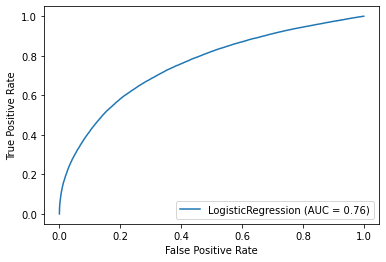

In [46]:
metrics.plot_roc_curve(clf, X, y)  
plt.show()                               

## Apply on test set

In [120]:
# logistic regression

X_test = df_test[["reordered_ratio", "order_dow","order_hour_of_day", "item_count", "no_orders", "order_frequency_without_lag_0", "days_lag_1", "days_lag_2", "days_lag_3", ]]
y_test = df_test["comes_within_14_days"]

fpr, tpr, thresholds = metrics.roc_curve(y_test, clf.predict(X_test))
fpr, tpr, thresholds
metrics.auc(fpr, tpr)

0.6888556428743118

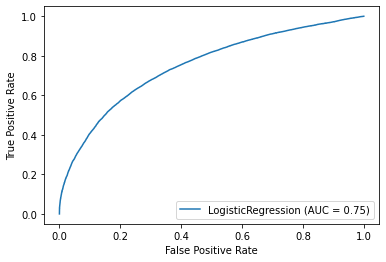

In [48]:
metrics.plot_roc_curve(clf, X_test, y_test)  
plt.show()                               

## Try Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier

# clf_rf = RandomForestClassifier(max_depth=4, random_state=0)
# clf_rf.fit(X, y)

In [56]:
from sklearn.model_selection import RandomizedSearchCV
from random import randint

param = {"max_depth": [1,3,4,5, 8, 10, None], 
         "n_estimators":[50, 70, 100, 150], 
          "max_features": [2,3,4,5,6],
          "criterion" : ['gini', 'entropy'],
          "bootstrap":[True, False],
          "min_samples_split": [1,2,3,4]}

rnd_search = RandomizedSearchCV(RandomForestClassifier(), param, n_iter = 30, cv=5, scoring ="roc_auc", n_jobs=-1,verbose=10)

rnd_search.fit(X,y)
rnd_search.best_params_
rnd_search.best_score_

# rf = RandomForestClassifier(max_depth=4, random_state=0)
# clf_rf = RandomizedSearchCV(rf, distributions, random_state=0)
# search = clf_rf.fit(X,y)
# search.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 19.6min finished


0.7619706954142621

In [57]:
rnd_search.best_params_

{'n_estimators': 70,
 'min_samples_split': 3,
 'max_features': 3,
 'max_depth': 10,
 'criterion': 'gini',
 'bootstrap': True}

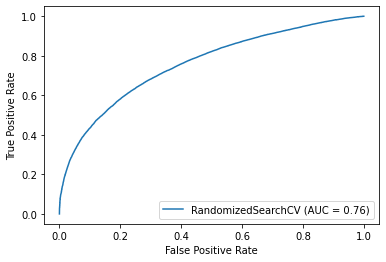

In [63]:
metrics.plot_roc_curve(rnd_search, X_test, y_test)  
plt.show()        

## Time shift for predictions

In [75]:
X.head()

,reordered_ratio,order_dow,order_hour_of_day,item_count,no_orders,order_frequency_without_lag_0,days_lag_1,days_lag_2,days_lag_3
71793,0.222222,5.333333,11.666667,2.666667,3.0,0.000000,0.0,0.0,0.0
203613,0.486189,3.923077,14.615385,10.384615,13.0,15.818182,30.0,13.0,30.0
196903,0.418448,3.052632,13.842105,8.631579,19.0,6.882353,3.0,16.0,5.0
12711,0.741667,4.400000,12.700000,2.800000,10.0,23.000000,12.0,30.0,30.0
178049,0.381985,3.545455,13.818182,13.000000,11.0,19.000000,30.0,12.0,6.0


In [113]:
X_shifted = df_4[["reordered_ratio", "order_dow","order_hour_of_day", "item_count", "no_orders", "order_frequency_in_days", "days_lag_0", "days_lag_1", "days_lag_2"]]
X_shifted.head()

,reordered_ratio,order_dow,order_hour_of_day,item_count,no_orders,order_frequency_in_days,days_lag_0,days_lag_1,days_lag_2
0,0.705833,2.500000,10.300000,5.900000,10.0,19.555556,30.0,0.0,14.0
1,0.447961,2.142857,10.571429,13.928571,14.0,15.230769,13.0,30.0,28.0
2,0.658817,1.083333,16.416667,7.333333,12.0,12.090909,15.0,11.0,17.0
3,0.028571,4.800000,12.600000,3.600000,5.0,13.750000,0.0,15.0,21.0
4,0.377778,1.750000,16.000000,9.250000,4.0,13.333333,19.0,10.0,11.0


In [148]:
df_5 = df_4.copy()
df_5["prediction"] = pd.DataFrame( rnd_search.predict_proba(X_shifted)[:,1])
df_5[df_5["prediction"]>0.8].head(30)

,reordered_ratio,order_dow,order_hour_of_day,order_frequency_in_days,item_count,no_orders,user_id,days_lag_0,days_lag_1,days_lag_2,days_lag_3,order_frequency_without_lag_0,comes_within_14_days,prediction
12,0.627017,3.083333,14.916667,7.636364,6.750000,12.0,13,6.0,8.0,7.0,7.0,7.800000,1,0.824974
26,0.669270,2.814815,12.469136,4.437500,9.481481,81.0,27,6.0,6.0,5.0,4.0,4.417722,1,0.954779
30,0.281645,2.200000,11.700000,4.894737,14.950000,20.0,31,0.0,4.0,0.0,8.0,5.166667,1,0.828252
49,0.823572,2.791045,11.253731,5.409091,6.761194,67.0,50,6.0,3.0,6.0,10.0,5.400000,1,0.955958
53,0.661967,3.428571,12.844156,4.776316,8.038961,77.0,54,1.0,8.0,2.0,2.0,4.826667,1,0.953489
89,0.885351,3.535211,12.126761,3.471429,9.436620,71.0,90,1.0,4.0,4.0,4.0,3.507246,1,0.969663
111,0.639927,3.115385,14.153846,8.000000,6.076923,26.0,112,5.0,5.0,2.0,4.0,8.125000,1,0.803677
131,0.658234,2.458333,11.458333,3.347826,4.833333,24.0,132,5.0,1.0,2.0,3.0,3.272727,1,0.920556
132,0.472496,2.650000,11.050000,6.473684,27.200000,20.0,133,6.0,7.0,5.0,8.0,6.500000,1,0.822546
139,0.731193,3.118421,13.986842,4.840000,15.144737,76.0,140,4.0,2.0,6.0,1.0,4.851351,1,0.968204


In [147]:
df_5[df_5["prediction"]<0.4].head(30)

,reordered_ratio,order_dow,order_hour_of_day,order_frequency_in_days,item_count,no_orders,user_id,days_lag_0,days_lag_1,days_lag_2,days_lag_3,order_frequency_without_lag_0,comes_within_14_days,prediction
0,0.705833,2.500000,10.300000,19.555556,5.900000,10.0,1,30.0,0.0,14.0,20.0,18.250000,0,0.366573
1,0.447961,2.142857,10.571429,15.230769,13.928571,14.0,2,13.0,30.0,28.0,30.0,15.416667,1,0.384183
7,0.305983,4.000000,2.666667,30.000000,16.333333,3.0,8,30.0,30.0,30.0,30.0,30.000000,0,0.245317
8,0.254545,2.000000,14.333333,18.000000,25.333333,3.0,9,30.0,6.0,6.0,6.0,6.000000,0,0.339340
9,0.325665,3.600000,16.600000,19.750000,28.600000,5.0,10,23.0,14.0,12.0,30.0,18.666667,0,0.253950
10,0.345037,4.285714,10.857143,20.500000,13.428571,7.0,11,30.0,7.0,30.0,30.0,18.600000,0,0.342897
11,0.145455,3.000000,9.400000,25.000000,14.800000,5.0,12,30.0,26.0,14.0,30.0,23.333333,0,0.219586
15,0.375842,2.000000,13.833333,21.800000,11.666667,6.0,16,26.0,30.0,12.0,21.0,20.750000,0,0.244266
22,0.083333,3.250000,11.750000,14.666667,10.000000,4.0,23,30.0,5.0,9.0,7.0,7.000000,0,0.377391
24,0.138889,2.333333,17.666667,30.000000,7.000000,3.0,25,30.0,30.0,30.0,30.0,30.000000,0,0.223973


In [149]:
y_pred_final = pd.DataFrame(df_4["user_id"])
y_pred_final["prediction"] = rnd_search.predict_proba(X_shifted)[:,1]
y_pred_final


,user_id,prediction
0,1,0.366573
1,2,0.384183
2,3,0.416431
3,4,0.458975
4,5,0.411377
...,...,...
206204,206205,0.343324
206205,206206,0.838659
206206,206207,0.520553
206207,206208,0.909173


In [156]:
pred_idx["yhat"] = y_pred_final["prediction"]
pred_idx

,user_id,order_number,yhat
0,1,11,0.366573
1,2,15,0.384183
2,3,13,0.416431
3,4,6,0.458975
4,5,5,0.411377
...,...,...,...
206204,206205,4,0.343324
206205,206206,68,0.838659
206206,206207,17,0.520553
206207,206208,50,0.909173


In [163]:
pred_idx.to_parquet("e02-06.parquet")

## Appendix: Check impact of features by simple linear regression

In [158]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
# X = df_train[["reordered_ratio", "order_dow","order_hour_of_day", "item_count", "no_orders", "order_frequency_without_lag_0", "days_lag_1", "days_lag_2", "days_lag_3", ]]
# y = df_train["comes_within_14_days"]
lm.fit(X, y)

LinearRegression()

In [159]:
lm.coef_

array([ 0.02585943,  0.00948823, -0.002138  ,  0.00101159,  0.00512139,
       -0.00593547, -0.00675568, -0.00443691, -0.00305349])

In [161]:
import statsmodels.api as sm
from scipy import stats

# X2 = sm.add_constant(X)
est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())

                                  OLS Regression Results                                 
Dep. Variable:     comes_within_14_days   R-squared (uncentered):                   0.572
Model:                              OLS   Adj. R-squared (uncentered):              0.572
Method:                   Least Squares   F-statistic:                          2.293e+04
Date:                  Sun, 29 Nov 2020   Prob (F-statistic):                        0.00
Time:                          14:25:49   Log-Likelihood:                         -98229.
No. Observations:                154656   AIC:                                  1.965e+05
Df Residuals:                    154647   BIC:                                  1.966e+05
Df Model:                             9                                                  
Covariance Type:              nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
--